In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Load data</b>

In [2]:
sales = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\SuperStoreOrders.csv')
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


<b>Data Exploration</b>

In [3]:
#checking for the rows and columns in the data
sales.shape

(51290, 21)

In [4]:
#checking for columns on the data
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [5]:
#checking for statistical information
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.00,9.24,36.81,8399.976
shipping_cost,51290.0,26.375915,57.296804,0.000,2.61,7.79,24.45,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000


In [6]:
#checking the data types
sales.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [7]:
#checking for null values
sales.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
#checking for the data information
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

<b>Data Cleaning Process</b>

In [9]:
#checking for duplicates
sales.duplicated().any()

False

In [10]:
#data type conversion
sales['order_date'] = pd.to_datetime(sales['order_date'])

sales['ship_date'] = pd.to_datetime(sales['ship_date'])
sales['ship_date']

sales['sales'] = pd.to_numeric(sales['sales'], errors='coerce')
sales['sales']

0        408.0
1        120.0
2         66.0
3         45.0
4        114.0
         ...  
51285     14.0
51286      4.0
51287     26.0
51288      7.0
51289      3.0
Name: sales, Length: 51290, dtype: float64

In [11]:
#using the title case
sales['region'] = sales['region'].str.title()
sales['region']

#Removing whitespace
sales['state'] = sales['state'].str.strip()
sales['state']

0             Constantine
1         New South Wales
2                Budapest
3               Stockholm
4         New South Wales
               ...       
51285          California
51286    Souss-Massa-Draâ
51287             Managua
51288           Chihuahua
51289            Colorado
Name: state, Length: 51290, dtype: object

In [12]:
#Removing unwanted columns
sales = sales.drop(columns=['ship_date', 'market', 'year'])
sales

,order_id,order_date,ship_mode,customer_name,segment,state,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2011-2040,2011-01-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,2011-01-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,2011-01-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,Emea,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,2011-01-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,2011-01-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,Standard Class,Erica Bern,Corporate,California,United States,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,2014-12-31,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,2014-12-31,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,2014-12-31,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.0,0.5600,0.20,Medium


<b>Carry out Analysis</b>

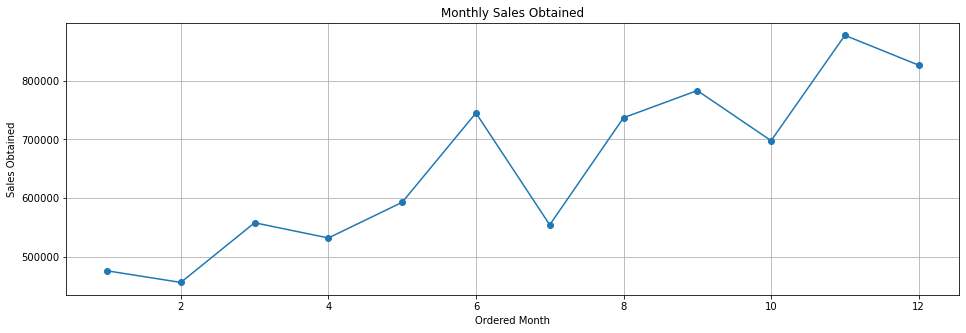

In [13]:
#monthly sales made
sales['order_month'] = sales['order_date'].dt.month
sales['order_month']

monthly_sales = sales.groupby('order_month')['sales'].sum().reset_index()
monthly_sales

#line plot
fig, ax=plt.subplots(figsize=(16,5))
ax.plot(monthly_sales['order_month'], monthly_sales['sales'], marker='o')
ax.set_xlabel("Ordered Month")
ax.set_ylabel("Sales Obtained")
ax.set_title("Monthly Sales Obtained")
plt.grid(True)
plt.show()

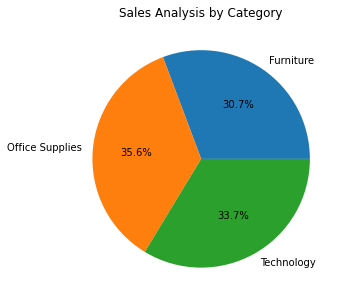

In [14]:
salesby_category = sales.groupby('category')['sales'].sum().reset_index()
salesby_category

#pie chart
fig, ax = plt.subplots(figsize=(16,5))
ax.pie(salesby_category['sales'], labels=salesby_category['category'], autopct='%1.1f%%')
plt.title('Sales Analysis by Category')
plt.show()

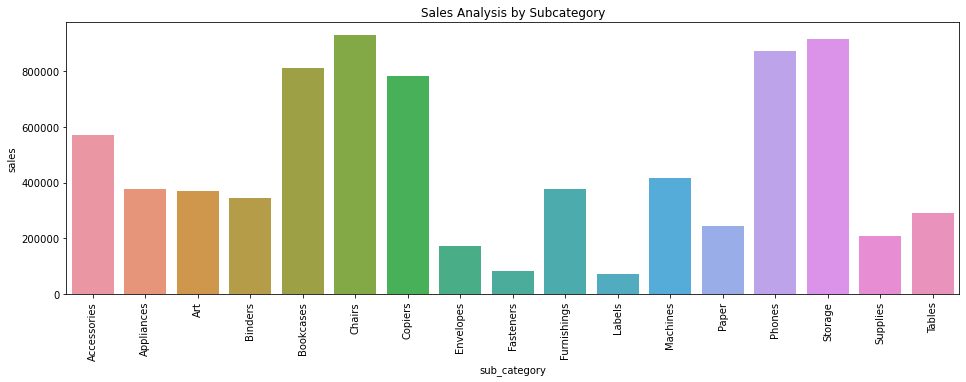

In [15]:
salesby_subcategory = sales.groupby('sub_category')['sales'].sum().reset_index()
salesby_subcategory

#bar graph
plt.figure(figsize=(16,5))
sns.barplot(data=salesby_subcategory, x='sub_category', y='sales')
plt.title("Sales Analysis by Subcategory")
plt.xticks(rotation=90)
plt.show()

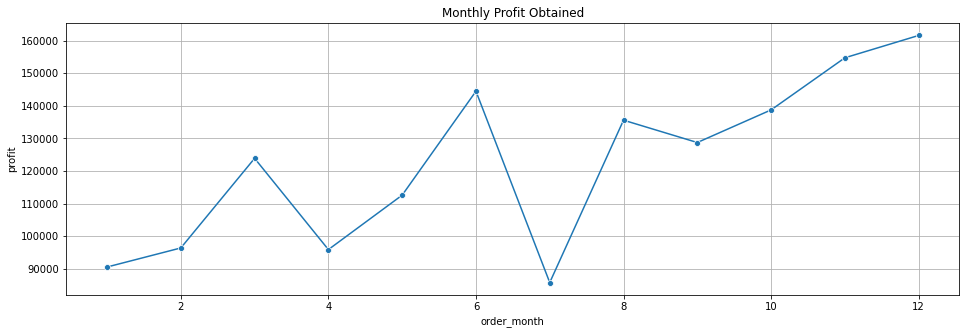

In [16]:
#monthly profit
monthly_profit = sales.groupby('order_month')['profit'].sum().reset_index()
monthly_profit


plt.figure(figsize=(16,5))
sns.lineplot(data=monthly_profit, x='order_month', y='profit', marker='o')
plt.title("Monthly Profit Obtained")
plt.grid(True)
plt.show()

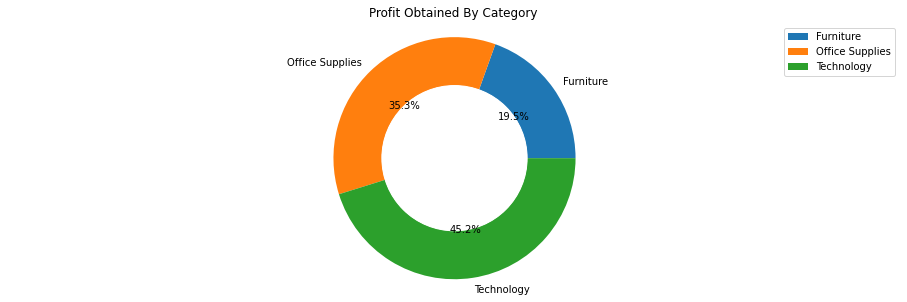

In [17]:
#profit obtained per category
profitper_category = sales.groupby('category')['profit'].sum().reset_index()
profitper_category

#donut chart
plt.figure(figsize=(16, 5))
plt.pie(profitper_category['profit'], labels=profitper_category['category'], autopct='%1.1f%%',wedgeprops={'width': 0.4})
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)
plt.title('Profit Obtained By Category')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

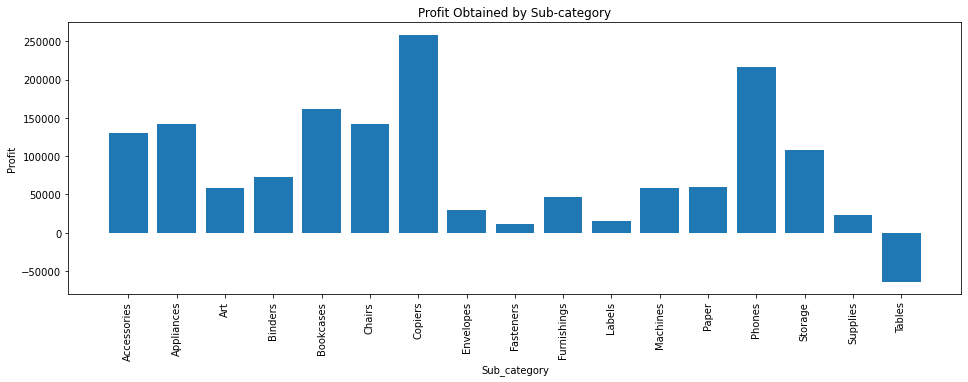

In [18]:
#profit by subcategory
profitby_subcategory = sales.groupby('sub_category')['profit'].sum().reset_index()
profitby_subcategory

#bar graph
plt.figure(figsize=(16, 5))
plt.bar(profitby_subcategory['sub_category'], profitby_subcategory['profit'])
plt.xlabel('Sub_category')
plt.ylabel('Profit')
plt.title('Profit Obtained by Sub-category')
plt.xticks(rotation=90)
plt.show()

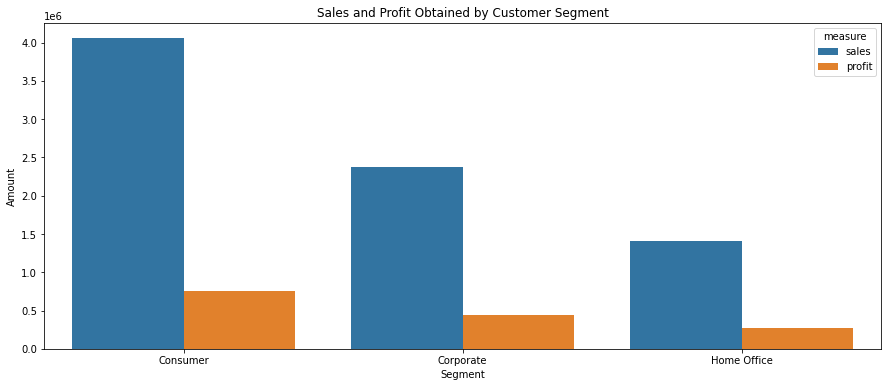

In [19]:
segment_salesprofit = sales.groupby('segment').agg({"sales":"sum", "profit":"sum"}).reset_index()
segment_salesprofit

#grouped bar graph
plt.figure(figsize=(15, 6))
sales = segment_salesprofit.melt(id_vars='segment', var_name='measure', value_name='amount')
sns.barplot(x='segment', y='amount', hue='measure', data=sales)
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title("Sales and Profit Obtained by Customer Segment")
plt.show()